In [1]:
import matplotlib.pylab as pl
import numpy as np
import ot
import ot.plot

import anndata
import scanpy as sc
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata_multi = sc.read_h5ad('../2-CellType/Epithelial/HALO/SSC_multiome.h5ad')
adata = sc.read_h5ad('../adata_epithelial_v7.h5ad')

In [3]:
adata_multi.obsm['X_umap_Multi'] = adata.obsm['X_umap_Multi']

In [4]:
adata_multi_NOR = adata_multi[adata_multi.obs['Disease'].isin(['NOR'])].copy()
adata_multi_SSC = adata_multi[adata_multi.obs['Disease'].isin(['SSC'])].copy()

In [5]:
adata_multi_NOR_ini  = adata_multi_NOR[adata_multi_NOR.obs['leiden_new'].isin(['0','1'])].copy()
adata_multi_NOR_end  = adata_multi_NOR[adata_multi_NOR.obs['leiden_new'].isin(['4','3','2'])].copy()

In [6]:
Xi = adata_multi_NOR_ini.obs[['atac_latent_0', 'atac_latent_1', 'atac_latent_2', 'atac_latent_3', 
                              'atac_latent_4', 'atac_latent_5', 'atac_latent_6', 'atac_latent_7', 
                              'atac_latent_8', 'atac_latent_9', 'atac_latent_10', 'atac_latent_11', 
                              'atac_latent_12', 'atac_latent_13', 'atac_latent_14', 'atac_latent_15', 
                              'atac_latent_16', 'atac_latent_17', 'atac_latent_18', 'atac_latent_19',
'rna_latent_0', 'rna_latent_1', 'rna_latent_2', 'rna_latent_3', 'rna_latent_4', 'rna_latent_5', 'rna_latent_6', 'rna_latent_7', 'rna_latent_8', 'rna_latent_9', 'rna_latent_10', 'rna_latent_11', 'rna_latent_12', 'rna_latent_13', 'rna_latent_14', 'rna_latent_15', 'rna_latent_16', 'rna_latent_17', 'rna_latent_18', 'rna_latent_19'
]].to_numpy(dtype='float64')
Yi = adata_multi_NOR_ini.obs['leiden_new'].tolist()
umap_i = adata_multi_NOR_ini.obsm['X_umap_Multi']


Xf = adata_multi_NOR_end.obs[['atac_latent_0', 'atac_latent_1', 'atac_latent_2', 'atac_latent_3', 
                              'atac_latent_4', 'atac_latent_5', 'atac_latent_6', 'atac_latent_7', 
                              'atac_latent_8', 'atac_latent_9', 'atac_latent_10', 'atac_latent_11', 
                              'atac_latent_12', 'atac_latent_13', 'atac_latent_14', 'atac_latent_15', 
                              'atac_latent_16', 'atac_latent_17', 'atac_latent_18', 'atac_latent_19',
'rna_latent_0', 'rna_latent_1', 'rna_latent_2', 'rna_latent_3', 'rna_latent_4', 'rna_latent_5', 'rna_latent_6', 'rna_latent_7', 'rna_latent_8', 'rna_latent_9', 'rna_latent_10', 'rna_latent_11', 'rna_latent_12', 'rna_latent_13', 'rna_latent_14', 'rna_latent_15', 'rna_latent_16', 'rna_latent_17', 'rna_latent_18', 'rna_latent_19'
                             ]].to_numpy(dtype='float64')
Yf = adata_multi_NOR_end.obs['leiden_new'].tolist()
umap_f = adata_multi_NOR_end.obsm['X_umap_Multi']

In [7]:
# from sklearn.model_selection import train_test_split
# sub_i, _, label_i, _ = train_test_split(np.concatenate((Xi,umap_i),axis=1), Yi, test_size=0.95, stratify=Yi, random_state=42)
# sub_f, _, label_f, _ = train_test_split(np.concatenate((Xf,umap_f),axis=1), Yf, test_size=0.8, stratify=Yf, random_state=42)

In [9]:
# Xi_sub = sub_i[:,:40]
# umap_i_sub = sub_i[:,40:42]

# Xf_sub = sub_f[:,:40]
# umap_f_sub = sub_f[:,40:42]

In [33]:
# print(Xi_sub.shape)
# print(Xf_sub.shape)

(133, 40)
(114, 40)


In [34]:
# n1 = len(Xi_sub)
# n2 = len(Xf_sub)
# a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2  # uniform distribution on samples

# M = ot.dist(Xi_sub, Xf_sub,metric = 'sqeuclidean')

In [39]:
# lambd = 1

# Gs = ot.sinkhorn(a, b, M, lambd)
# # Ges = ot.bregman.empirical_sinkhorn(Xi, Xf, lambd)


In [1]:
# color_set =  {'0' : '#e41a1c', '1' : '#4daf4a', '2':'#ff7f00','3' : '#a65628','4':'#999999'}


# # pl.plot(umap_i_sub[:,0], umap_i_sub[:,1], '+', label='Initial State',c=pd.array(label_i).map(color_set).tolist())


# pl.figure(10)
# ot.plot.plot2D_samples_mat(umap_i_sub, umap_f_sub, Gs, 
#                            color=[.5, .5, 1], thr=1e-10)
# pl.scatter(umap_i_sub[:,0], umap_i_sub[:,1], c=pd.array(label_i).map(color_set).tolist())
# pl.scatter(umap_f_sub[:,0], umap_f_sub[:,1], c=pd.array(label_f).map(color_set).tolist())
# # pl.legend(loc=0)

# pl.show()


In [7]:
n1 = len(Xi)
n2 = len(Xf)
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2  # uniform distribution on samples

M = ot.dist(Xi, Xf,metric = 'sqeuclidean')

In [50]:
lambd = 1e-1
# lambd = 4e-1

Gs = ot.sinkhorn(a, b, M, lambd)
# Ges = ot.bregman.empirical_sinkhorn(Xi, Xf, lambd)

# pl.figure(5)
# pl.imshow(Gs, interpolation='nearest')
# pl.title('OT matrix sinkhorn')

/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: divide by zero encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: overflow encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


In [75]:
def plot2D_samples_mat(xs, xt, G, thr=1e-8,color =[.5, .5, 1] ):
    r""" Plot matrix :math:`\mathbf{G}` in 2D with lines using alpha values

    Plot lines between source and target 2D samples with a color
    proportional to the value of the matrix :math:`\mathbf{G}` between samples.


    Parameters
    ----------
    xs : ndarray, shape (ns,2)
        Source samples positions
    b : ndarray, shape (nt,2)
        Target samples positions
    G : ndarray, shape (na,nb)
        OT matrix
    thr : float, optional
        threshold above which the line is drawn
    **kwargs : dict
        parameters given to the plot functions (default color is black if
        nothing given)
    """

#     if ('color' not in kwargs) and ('c' not in kwargs):
#         kwargs['color'] = 'k'
    mx = G.max()
#     if 'alpha' in kwargs:
#         scale = kwargs['alpha']
#         del kwargs['alpha']
#     else:
#         scale = 1
    for i in range(xs.shape[0]):
        for j in range(xt.shape[0]):
            if G[i, j] / mx > thr:
                pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]],
                        alpha=0.05,c = color)

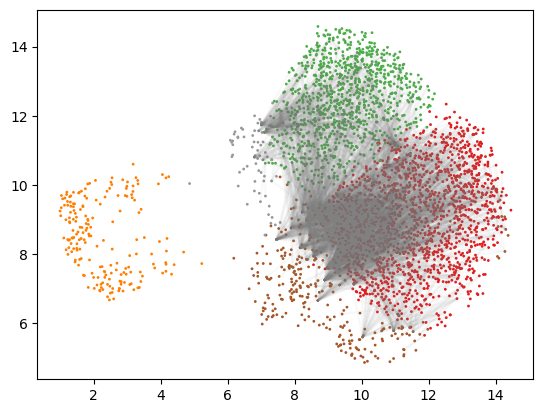

In [81]:
color_set =  {'0' : '#e41a1c', '1' : '#4daf4a', '2':'#ff7f00','3' : '#a65628','4':'#999999'}


pl.figure(8)
plot2D_samples_mat(umap_i, umap_f, Gs, 
                           color='grey', thr=np.percentile(Gs,99.999))
pl.scatter(umap_i[:,0], umap_i[:,1], c=pd.array(Yi).map(color_set).tolist(),s=1)
pl.scatter(umap_f[:,0], umap_f[:,1], c=pd.array(Yf).map(color_set).tolist(),s=1)
pl.show()


In [82]:
prob_matrix = Gs

row_groups = np.array(Yi)  
column_groups = np.array(Yf)


row_group = np.unique(row_groups)
col_group = np.unique(column_groups)
num_row_groups = row_group.size
num_col_groups = col_group.size


agg_matrix = np.zeros((num_row_groups, num_col_groups))



# Aggregate probabilities
for i, rg in enumerate(row_group):
    for j, cg in enumerate(col_group):
        row_indices = np.where(row_groups == rg)[0]
        col_indices = [index for index, val in enumerate(column_groups) if val == cg]
        
        cell_sum = 0
        for ri in row_indices:
            for ci in col_indices:
#                 if ri < prob_matrix.shape[0] and ci < prob_matrix.shape[1]:
                    cell_sum += prob_matrix[ri, ci]
        
        # Assign the sum to the aggregated matrix cell
        agg_matrix[i, j] = cell_sum

# Display the aggregated matrix


row_sums = agg_matrix.sum(axis=1, keepdims=True)
normalized_matrix = agg_matrix / row_sums

normalized_matrix

array([[1.96741416e-56, 1.00000000e+00, 5.27607042e-33],
       [3.39200601e-76, 9.99967803e-01, 3.21968530e-05]])

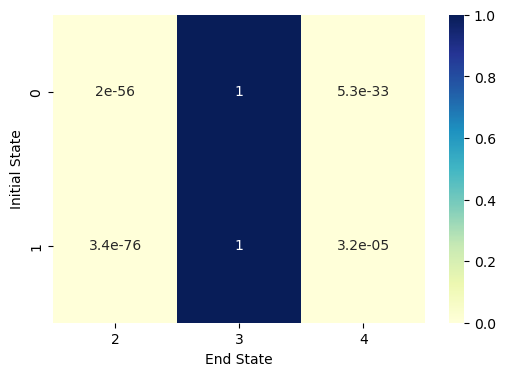

In [84]:
# Assign row names and column names
row_names = ['0', '1']
column_names = ['2', '3', '4']

# Visualize the row-normalized probability matrix with row names and column names
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_matrix, annot=True, cmap='YlGnBu', 
            cbar=True, xticklabels=column_names, yticklabels=row_names)
# plt.title('Heatmap of Row-Normalized Probability Matrix with Row and Column Names')
plt.ylabel('Initial State')
plt.xlabel('End State')
plt.show()


np.save('Gs_NOR_lambd_1e-1.npy', Gs) # save
# new_num_arr = np.load('Gs_NOR.npy') # load

/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: divide by zero encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: overflow encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


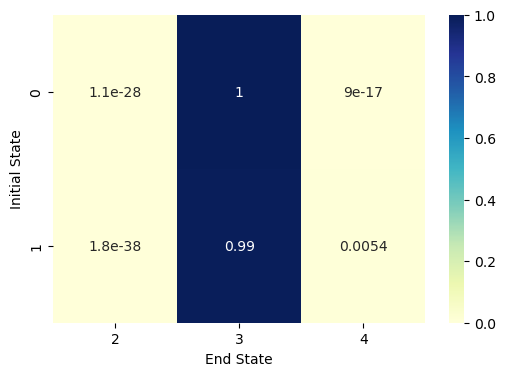

In [85]:
lambd = 2e-1
# lambd = 4e-1

Gs = ot.sinkhorn(a, b, M, lambd)

prob_matrix = Gs

row_groups = np.array(Yi)  
column_groups = np.array(Yf)


row_group = np.unique(row_groups)
col_group = np.unique(column_groups)
num_row_groups = row_group.size
num_col_groups = col_group.size


agg_matrix = np.zeros((num_row_groups, num_col_groups))



# Aggregate probabilities
for i, rg in enumerate(row_group):
    for j, cg in enumerate(col_group):
        row_indices = np.where(row_groups == rg)[0]
        col_indices = [index for index, val in enumerate(column_groups) if val == cg]
        
        cell_sum = 0
        for ri in row_indices:
            for ci in col_indices:
#                 if ri < prob_matrix.shape[0] and ci < prob_matrix.shape[1]:
                    cell_sum += prob_matrix[ri, ci]
        
        # Assign the sum to the aggregated matrix cell
        agg_matrix[i, j] = cell_sum

# Display the aggregated matrix


row_sums = agg_matrix.sum(axis=1, keepdims=True)
normalized_matrix = agg_matrix / row_sums


# Assign row names and column names
row_names = ['0', '1']
column_names = ['2', '3', '4']

# Visualize the row-normalized probability matrix with row names and column names
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_matrix, annot=True, cmap='YlGnBu', 
            cbar=True, xticklabels=column_names, yticklabels=row_names)
# plt.title('Heatmap of Row-Normalized Probability Matrix with Row and Column Names')
plt.ylabel('Initial State')
plt.xlabel('End State')
plt.show()


np.save('Gs_NOR_lambd_2e-1.npy', Gs) # save
# new_num_arr = np.load('Gs_NOR.npy') # load

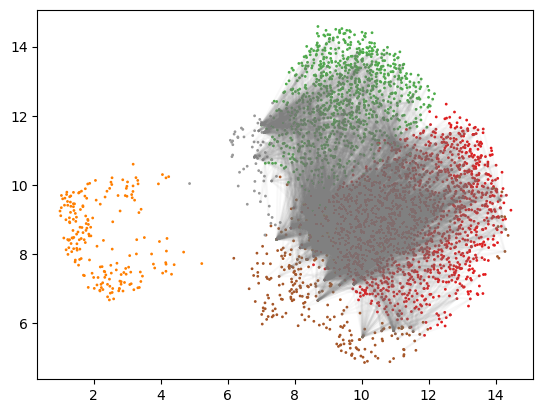

In [86]:
color_set =  {'0' : '#e41a1c', '1' : '#4daf4a', '2':'#ff7f00','3' : '#a65628','4':'#999999'}


pl.figure(8)
plot2D_samples_mat(umap_i, umap_f, Gs, 
                           color='grey', thr=np.percentile(Gs,99.999))
pl.scatter(umap_i[:,0], umap_i[:,1], c=pd.array(Yi).map(color_set).tolist(),s=1)
pl.scatter(umap_f[:,0], umap_f[:,1], c=pd.array(Yf).map(color_set).tolist(),s=1)
pl.show()


In [87]:
adata_multi_SSC_ini  = adata_multi_SSC[adata_multi_SSC.obs['leiden_new'].isin(['0','1'])].copy()
adata_multi_SSC_end  = adata_multi_SSC[adata_multi_SSC.obs['leiden_new'].isin(['4','3','2'])].copy()

In [88]:
Xi = adata_multi_SSC_ini.obs[['atac_latent_0', 'atac_latent_1', 'atac_latent_2', 'atac_latent_3', 
                              'atac_latent_4', 'atac_latent_5', 'atac_latent_6', 'atac_latent_7', 
                              'atac_latent_8', 'atac_latent_9', 'atac_latent_10', 'atac_latent_11', 
                              'atac_latent_12', 'atac_latent_13', 'atac_latent_14', 'atac_latent_15', 
                              'atac_latent_16', 'atac_latent_17', 'atac_latent_18', 'atac_latent_19',
'rna_latent_0', 'rna_latent_1', 'rna_latent_2', 'rna_latent_3', 'rna_latent_4', 'rna_latent_5', 'rna_latent_6', 'rna_latent_7', 'rna_latent_8', 'rna_latent_9', 'rna_latent_10', 'rna_latent_11', 'rna_latent_12', 'rna_latent_13', 'rna_latent_14', 'rna_latent_15', 'rna_latent_16', 'rna_latent_17', 'rna_latent_18', 'rna_latent_19'
                             ]].to_numpy(dtype='float64')
Yi = adata_multi_SSC_ini.obs['leiden_new'].tolist()
umap_i = adata_multi_SSC_ini.obsm['X_umap_Multi']


Xf = adata_multi_SSC_end.obs[['atac_latent_0', 'atac_latent_1', 'atac_latent_2', 'atac_latent_3', 
                              'atac_latent_4', 'atac_latent_5', 'atac_latent_6', 'atac_latent_7', 
                              'atac_latent_8', 'atac_latent_9', 'atac_latent_10', 'atac_latent_11', 
                              'atac_latent_12', 'atac_latent_13', 'atac_latent_14', 'atac_latent_15', 
                              'atac_latent_16', 'atac_latent_17', 'atac_latent_18', 'atac_latent_19',
'rna_latent_0', 'rna_latent_1', 'rna_latent_2', 'rna_latent_3', 'rna_latent_4', 'rna_latent_5', 'rna_latent_6', 'rna_latent_7', 'rna_latent_8', 'rna_latent_9', 'rna_latent_10', 'rna_latent_11', 'rna_latent_12', 'rna_latent_13', 'rna_latent_14', 'rna_latent_15', 'rna_latent_16', 'rna_latent_17', 'rna_latent_18', 'rna_latent_19'

                             ]].to_numpy(dtype='float64')
Yf = adata_multi_SSC_end.obs['leiden_new'].tolist()
umap_f = adata_multi_SSC_end.obsm['X_umap_Multi']

In [89]:
n1 = len(Xi)
n2 = len(Xf)
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2  # uniform distribution on samples

M = ot.dist(Xi, Xf,metric = 'sqeuclidean')

In [90]:
lambd = 1e-1

Gs = ot.sinkhorn(a, b, M, lambd)

/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: divide by zero encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: overflow encountered in divide
  v = b / KtransposeU
/net/talisker/home/benos/mij51/miniconda3/envs/MIRA_ENV/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


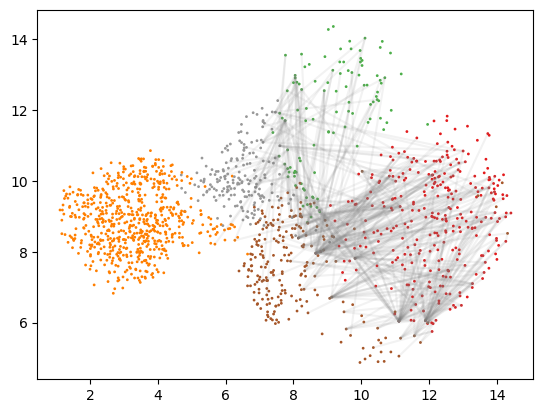

In [95]:
def plot2D_samples_mat(xs, xt, G, thr=1e-8,color =[.5, .5, 1] ):
    r""" Plot matrix :math:`\mathbf{G}` in 2D with lines using alpha values

    Plot lines between source and target 2D samples with a color
    proportional to the value of the matrix :math:`\mathbf{G}` between samples.


    Parameters
    ----------
    xs : ndarray, shape (ns,2)
        Source samples positions
    b : ndarray, shape (nt,2)
        Target samples positions
    G : ndarray, shape (na,nb)
        OT matrix
    thr : float, optional
        threshold above which the line is drawn
    **kwargs : dict
        parameters given to the plot functions (default color is black if
        nothing given)
    """

#     if ('color' not in kwargs) and ('c' not in kwargs):
#         kwargs['color'] = 'k'
    mx = G.max()
#     if 'alpha' in kwargs:
#         scale = kwargs['alpha']
#         del kwargs['alpha']
#     else:
#         scale = 1
    for i in range(xs.shape[0]):
        for j in range(xt.shape[0]):
            if G[i, j] / mx > thr:
                pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]],
                        alpha=0.1,c = color)

color_set =  {'0' : '#e41a1c', '1' : '#4daf4a', '2':'#ff7f00','3' : '#a65628','4':'#999999'}


pl.figure(8)
plot2D_samples_mat(umap_i, umap_f, Gs, 
                           color='grey', thr=np.percentile(Gs,99.999))
pl.scatter(umap_i[:,0], umap_i[:,1], c=pd.array(Yi).map(color_set).tolist(),s=1)
pl.scatter(umap_f[:,0], umap_f[:,1], c=pd.array(Yf).map(color_set).tolist(),s=1)
pl.show()


In [92]:
prob_matrix = Gs

row_groups = np.array(Yi)  
column_groups = np.array(Yf)


row_group = np.unique(row_groups)
col_group = np.unique(column_groups)
num_row_groups = row_group.size
num_col_groups = col_group.size


agg_matrix = np.zeros((num_row_groups, num_col_groups))



# Aggregate probabilities
for i, rg in enumerate(row_group):
    for j, cg in enumerate(col_group):
        row_indices = np.where(row_groups == rg)[0]
        col_indices = [index for index, val in enumerate(column_groups) if val == cg]
        
        cell_sum = 0
        for ri in row_indices:
            for ci in col_indices:
                if ri < prob_matrix.shape[0] and ci < prob_matrix.shape[1]:
                    cell_sum += prob_matrix[ri, ci]
        
        # Assign the sum to the aggregated matrix cell
        agg_matrix[i, j] = cell_sum

# Display the aggregated matrix
row_sums = agg_matrix.sum(axis=1, keepdims=True)
normalized_matrix = agg_matrix / row_sums

normalized_matrix

array([[2.82286885e-46, 1.00000000e+00, 4.50641399e-48],
       [2.50221673e-40, 6.55040870e-02, 9.34495913e-01]])

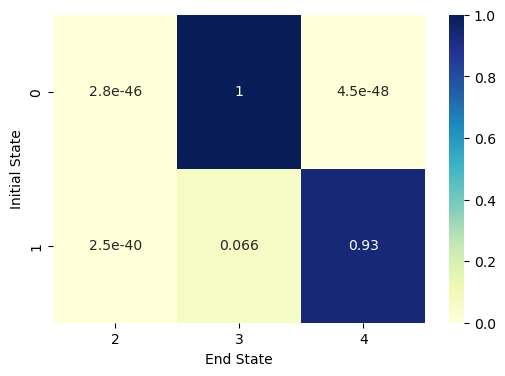

In [94]:
# Assign row names and column names
row_names = ['0', '1']
column_names = ['2', '3', '4']

# Visualize the row-normalized probability matrix with row names and column names
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_matrix, annot=True, cmap='YlGnBu', 
            cbar=True, xticklabels=column_names, yticklabels=row_names)
# plt.title('Heatmap of Row-Normalized Probability Matrix with Row and Column Names')
plt.ylabel('Initial State')
plt.xlabel('End State')
plt.show()

np.save('Gs_SSC_lambd_1e-1.npy', Gs) # save
